# Principle Component Analysis (PCA)

- PCA nerelerde kullanilir?
* 1) Feature extraction (yeni featurelar yaratmak icin)
* 2) Feature dimentiob reduction (feature sayisini azaltmak icin)
* 3) Stok market prediction
* 4) Gene data analysis

- Örneğin 10 boyutlu bir datayi gorsellestirmek icin datayi 2 boyuluya dusuruyoruz.
- higher dimension => lower dimension
- bunu yaparken varyansi buyuk olmali, yani olabildigince datayi kaybetmemem gerekir.

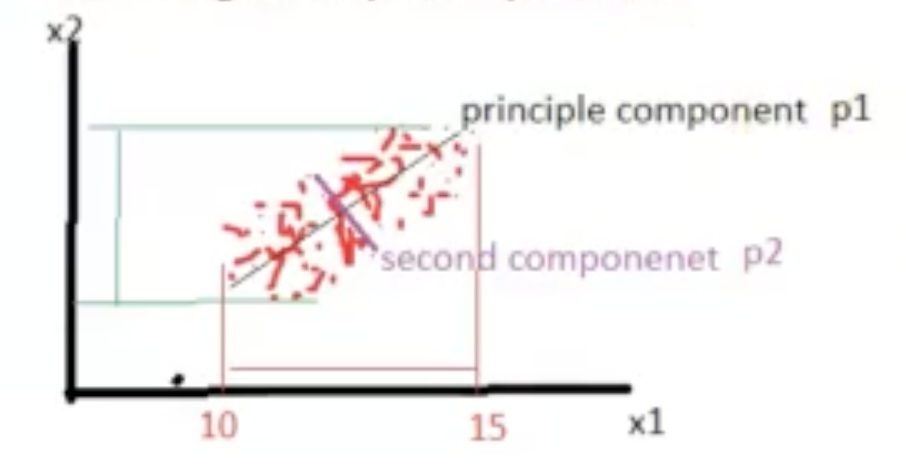

In [6]:
from IPython.display import Image
Image(filename='pca.png') 

- Yukaridaki gorsel iki boyutu ifade ediyor biz p1'i kullanara bunu tek boyuta cevirmis oluruz.
- Burada p1 cizgisi max varyansi gosterir.

In [7]:
from sklearn.datasets import load_iris
import pandas as pd

In [8]:
iris = load_iris()

In [12]:
data = iris.data #bunu dedigimde dataya esitlemis oldum

In [13]:
feature_names = iris.feature_names
y = iris.target

In [14]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
y #target class bunu label yapacagiz

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
df = pd.DataFrame(data,columns=feature_names) #df'e cevirdik

In [19]:
df["sinif"] = y #dataframe sinif diye volumn ekleyip y'e esitledik.

In [20]:
x = data  #datanin turu numpy array

- 4 boyutlu datami 2 boyuta cevirmek istiyorum bu yüzden n_components=2 olacak

In [23]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2,whiten=True) #whiten normalize etmek demek
pca.fit(x) #bunu yazinca 4 boyutlu datayi 2'ye indirecek modeli elde etmis oluyorum

PCA(n_components=2, whiten=True)

In [24]:
x_pca = pca.transform(x)
#x'i pca modeline gore 4'ten ikiye indir  ve bunu x_pca diye bir degere esitle

In [25]:
x_pca

array([[-1.30533786,  0.64836932],
       [-1.31993521, -0.35930856],
       [-1.40496732, -0.29424412],
       [-1.33510889, -0.64613986],
       [-1.32702321,  0.6633044 ],
       [-1.10922246,  1.50488434],
       [-1.3716775 , -0.18160462],
       [-1.27714084,  0.33166784],
       [-1.40369908, -1.17396001],
       [-1.29980851, -0.23095919],
       [-1.2191728 ,  1.30947554],
       [-1.27062918,  0.02990145],
       [-1.35493432, -0.47727214],
       [-1.5677929 , -1.03811965],
       [-1.28618899,  2.39286603],
       [-1.16037307,  2.71623681],
       [-1.2758681 ,  1.64566141],
       [-1.28791362,  0.63304684],
       [-1.06981161,  1.77184386],
       [-1.25858365,  1.04251602],
       [-1.12351854,  0.79442356],
       [-1.23704894,  0.87897239],
       [-1.56396833,  0.27093722],
       [-1.11985996,  0.20037678],
       [-1.14564495, -0.07568135],
       [-1.21903752, -0.29641102],
       [-1.20063096,  0.26582861],
       [-1.24610158,  0.74646111],
       [-1.28365251,

- suan iki boyutlu bunlardan biri p1 digeri p2 bunlarin hangisinin hangi indiste oldugunu bulmak icin:

In [27]:
print("varience ratio: ",pca.explained_variance_ratio_)

varience ratio:  [0.92461872 0.05306648]


- bu demek oluyor ki %92'lik kisim pca1, %5lik kisim pc2.

In [28]:
print("sum: ", sum(pca.explained_variance_ratio_))

sum:  0.977685206318795


- bu demek oluyor ki ben %97 oraninda varyansa sahibim ve %3'luk bir bilgi kaybi yasamisim.

In [29]:
df.shape

(150, 5)

In [30]:
df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]
#datama p1 ve p2 olarak column ekledim.

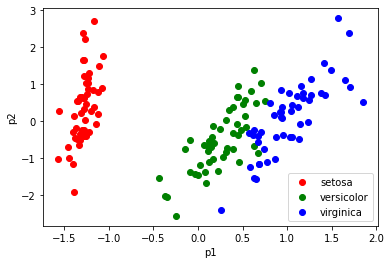

In [33]:
#2D
color = ["red","green","blue"]
import matplotlib.pyplot as plt 
for each in range(3): #uc farkli iris turum oldugu icin range 3 oldu.
    plt.scatter(df.p1[df.sinif==each],df.p2[df.sinif==each], color=color[each], label = iris.target_names[each])
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()